Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods


In [10]:
import numpy as np
import matplotlib as plt
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize, brute

In [14]:
#Task 1 
def cube(input):
    return input**3

def module(input):
    return abs(input-0.2)

def sinus(input):
    return input*np.sin(1/input)

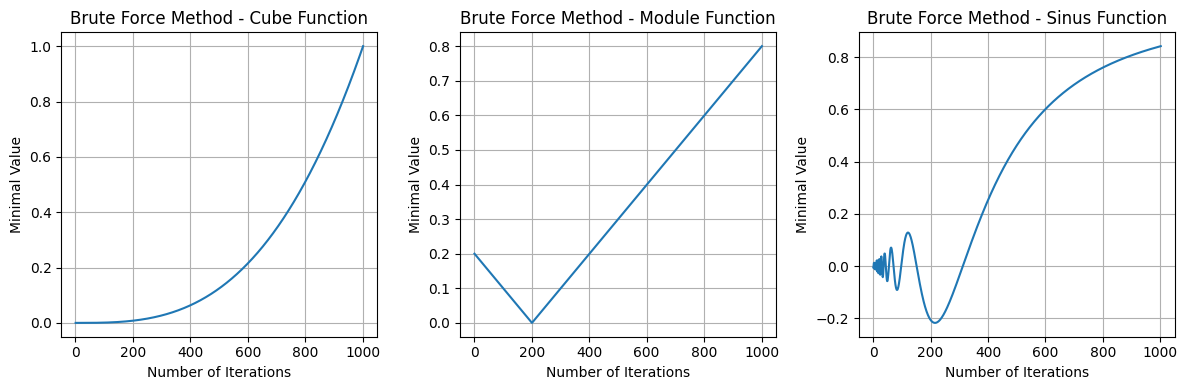

In [57]:
#1.1. Brute Force method
def brute_force(function):
    min_values = []  # Store minimal values
    iterations = []  # Store the number of iterations
    N = 0

    if str(function.__name__) == 'sinus':
        for i in range(0, 1001):
            N += 1
            min_values.append(function(0.99 / 1000 * i + 0.01))
            iterations.append(N)
    else:
        for i in range(0, 1001):
            N += 1
            min_values.append(function(i / 1000))
            iterations.append(N)

    return min_values, iterations

# Calculate results for the given functions
min_values_cube, iterations_cube = brute_force(cube)
min_values_module, iterations_module = brute_force(module)
min_values_sinus, iterations_sinus = brute_force(sinus)

# Create plots for Brute Force Method
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(iterations_cube, min_values_cube, label="Cube Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Brute Force Method - Cube Function")
plt.grid(True)

plt.subplot(132)
plt.plot(iterations_module, min_values_module, label="Module Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Brute Force Method - Module Function")
plt.grid(True)

plt.subplot(133)
plt.plot(iterations_sinus, min_values_sinus, label="Sinus Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Brute Force Method - Sinus Function")
plt.grid(True)

plt.tight_layout()
plt.show()

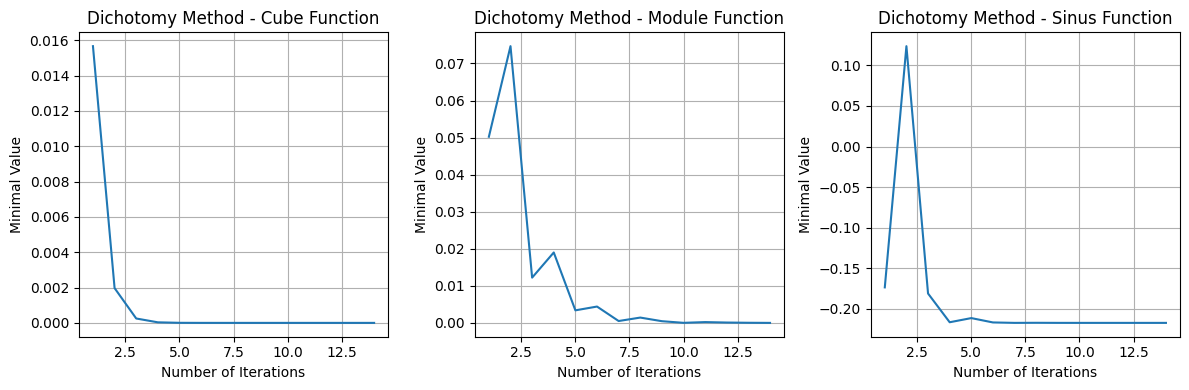

In [56]:
#1.2. Dichotomy method

# Define the dichotomy method
def dichotomy(function, a, b):
    beta = 0.0009
    s = 0
    N = 0
    min_values = []  
    iterations = [] 

    while abs(a - b) >= 0.001:
        N += 1
        s += 2
        x1 = (a + b - beta) / 2
        x2 = (a + b + beta) / 2
        if function(x1) <= function(x2):
            b = x2
        else:
            a = x1

        # Store the minimal value and the number of iterations at each step
        min_values.append(function((a + b) / 2))
        iterations.append(N)

    return min_values, iterations

# Calculate results for the given functions
min_values_cube, iterations_cube = dichotomy(cube, 0, 1)
min_values_module, iterations_module = dichotomy(module, 0, 1)
min_values_sinus, iterations_sinus = dichotomy(sinus, 0.01, 1)

# Create plots for Dichotomy Method
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(iterations_cube, min_values_cube, label="Cube Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Dichotomy Method - Cube Function")
plt.grid(True)

plt.subplot(132)
plt.plot(iterations_module, min_values_module, label="Module Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Dichotomy Method - Module Function")
plt.grid(True)

plt.subplot(133)
plt.plot(iterations_sinus, min_values_sinus, label="Sinus Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Dichotomy Method - Sinus Function")
plt.grid(True)

plt.tight_layout()
plt.show()

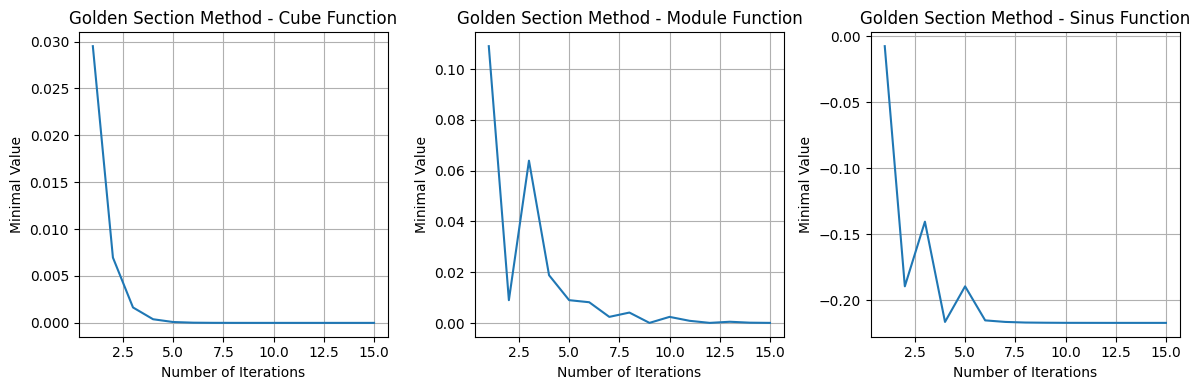

In [58]:
#1.3.  Golden section method
def golden(function, a, b):
    min_values = []  # Store minimal values
    iterations = []  # Store the number of iterations
    s = 0
    N = 0
    x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
    x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
    
    while abs(a - b) >= 0.001:
        N += 1
        s += 1
        if function(x1) <= function(x2):
            b = x2
            x2 = x1
            x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
        else:
            a = x1
            x1 = x2
            x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
        
        min_values.append(function((a + b) / 2))
        iterations.append(N)
    
    return min_values, iterations

# Calculate results for the given functions
min_values_cube, iterations_cube = golden(cube, 0, 1)
min_values_module, iterations_module = golden(module, 0, 1)
min_values_sinus, iterations_sinus = golden(sinus, 0.01, 1)

# Create plots for Golden Section Method
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(iterations_cube, min_values_cube, label="Cube Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Golden Section Method - Cube Function")
plt.grid(True)

plt.subplot(132)
plt.plot(iterations_module, min_values_module, label="Module Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Golden Section Method - Module Function")
plt.grid(True)

plt.subplot(133)
plt.plot(iterations_sinus, min_values_sinus, label="Sinus Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Minimal Value")
plt.title("Golden Section Method - Sinus Function")
plt.grid(True)

plt.tight_layout()
plt.show()

TASK 2

In [25]:
#Task 2 
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = np.array([i/100 for i in range(0, 101)])
yk = [alpha * i + beta + random.normalvariate(0.5, 0.125) for i in xk]

[a,b] = [0.6133652191296756, 0.9176197556684853]


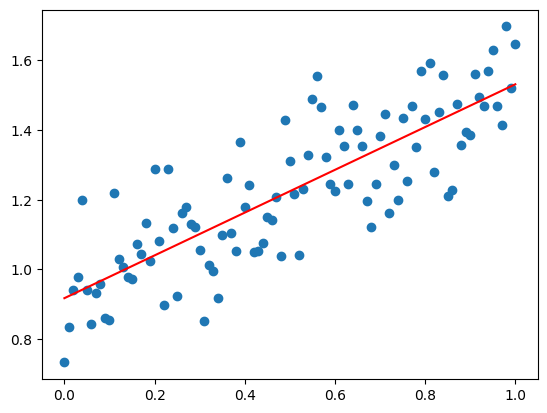

In [26]:
A = np.vstack([xk, np.ones(len(xk))]).T
a, b = np.linalg.lstsq(A, yk, rcond=None)[0]

plt.scatter(xk, yk)
plt.plot(xk, a*xk+b, 'r')
print('[a,b] =',[a, b])
plt.show()

[a, b, f-calculations, N of iterations] = [0.613, 0.918, 1002001, 1002001]


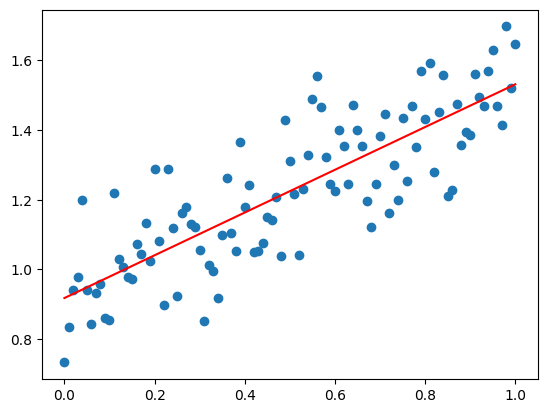

In [43]:
# 2 Exhaustive search for linear search

list1= []
for a in range (0,1001):
    a = a/1000
    for b in range(0,1001):
        b = b/1000
        s=0
        for k in range(0,101):
            s+=(a*xk[k]+b -yk[k])**2
        list1.append([s,a,b])

minimum = min(x[0] for x in list1)
for sublist in list1:
    if sublist[0] ==minimum:
        a = sublist[1]
        b = sublist[2]
        break
exh_line= [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a*xk+b, 'r')
print('[a, b, f-calculations, N of iterations] =',[a, b, 1001*1001, 1001*1001],)

[a,b, f-calculations, N of iterations] = [0.968, -0.387, 1000000, 1000000]


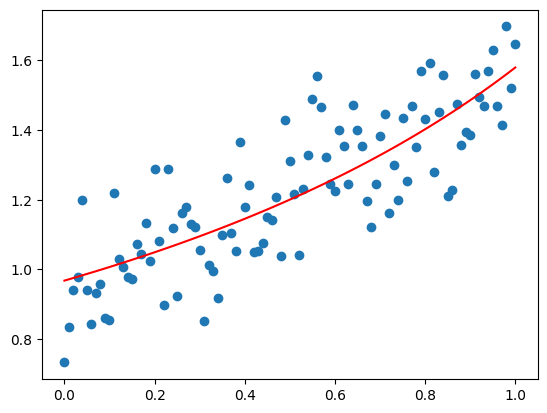

In [46]:
#Exhastive search for rational function

list2=[]

for a in range(0,1000):
    a = a/1000
    for b in range(0,1000):
        b = -b/1000
        s=0
        for k in range(0,101):
            s+=(a/(1+b*xk[k])-yk[k])**2
        list2.append([s,a,b])
minimum = min(x[0] for x in list2)
for sublist in list2:
    if sublist[0] == minimum:
        a = sublist[1]
        b = sublist[2]
        break

exh_rat = [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a / (1 + b * xk), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, 1000 ** 2, 1000 ** 2])

[a,b, f-calculations, N of iterations] = [0.616, 0.916, 36036, 36]


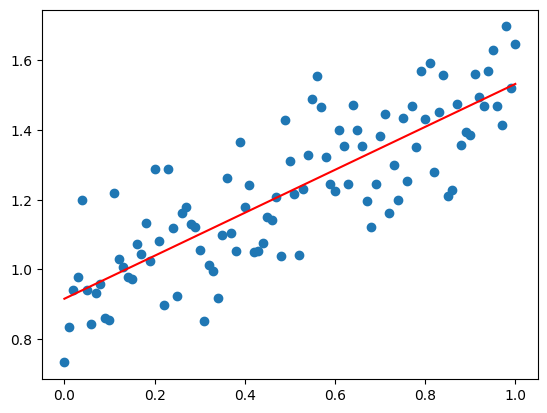

In [34]:
# Gauss method for linear function
a1 = 0.05
b1 = 0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1001):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a * xk[k] + b1 - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1001):
        f_calc += 1
        b = b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 * xk[k] + b - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / 1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_lin = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1*xk+b1, 'r')

print('[a,b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

[a, b, f-calculations, N of iterations] = [0.97, -0.385, 21000, 22]


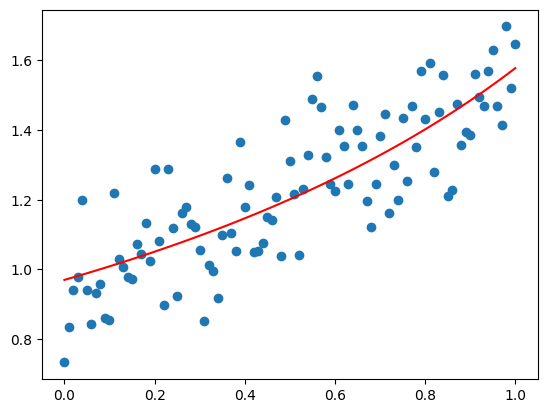

In [37]:
#Gauss (coordinate descent) method for rational function
a1 = 0.05
b1 = -0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1000):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a / (1 + b1 * xk[k]) - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1000):
        f_calc += 1
        b = -b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 / (1 + b * xk[k]) - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / -1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_rat = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1 / (1 + b1 * xk), 'r')

print('[a, b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

Optimization terminated successfully.
         Current function value: 1.521836
         Iterations: 41
         Function evaluations: 80
[a, b] = [0.61275669 0.91775953]


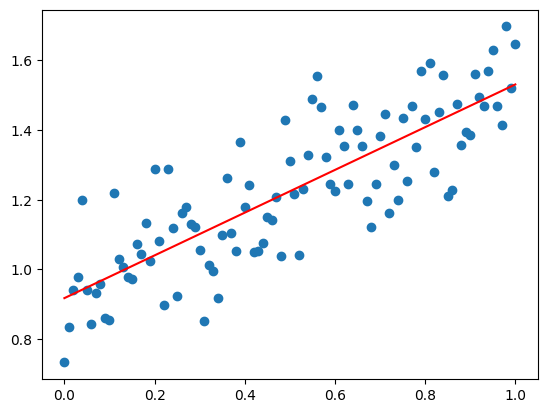

In [35]:
# Nelder- Mead for linear function
from scipy.optimize import minimize

def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a * xk[k] + b - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_lin = result.x
print ('[a, b] =',result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] * xk + result.x[1], 'r')

Optimization terminated successfully.
         Current function value: 1.561853
         Iterations: 39
         Function evaluations: 72
[a, b] = [ 0.96800971 -0.3867742 ]


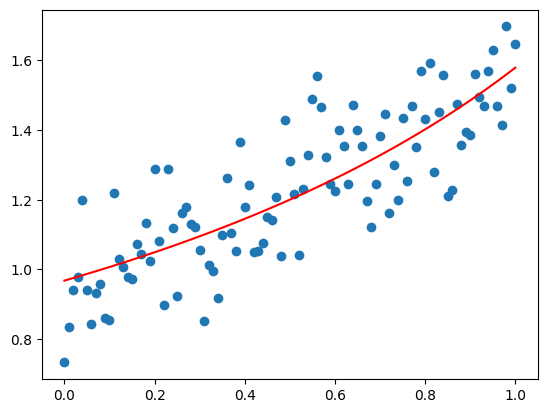

In [38]:
# Nelder-Mead method for rational function
def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a / (1 + b * xk[k]) - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_rat = result.x
print ('[a, b] =', result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] / (1 + result.x[1] * xk), 'r')

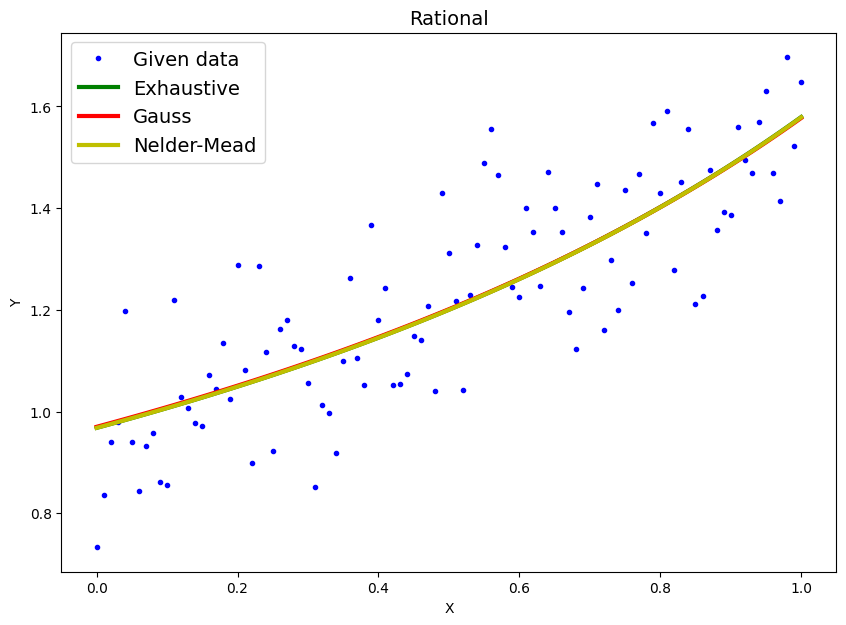

In [48]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_rat[0] / (1 + exh_rat[1]*xk), 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_rat[0] / (1 + gs_rat[1]*xk), 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_rat[0] / (1 + nm_rat[1]*xk), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)

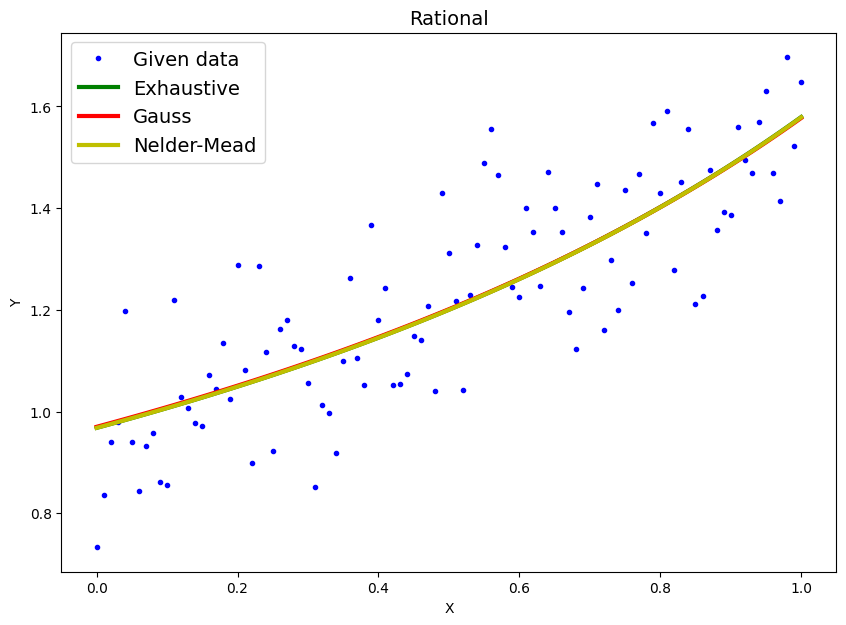

In [49]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize =14)
plt.plot(xk,yk, '.b', label ="Given data")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xk, exh_rat[0] / (1 + exh_rat[1]*xk), 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_rat[0] / (1 + gs_rat[1]*xk), 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_rat[0] / (1 + nm_rat[1]*xk), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)
